In [1]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
#open dataset.csv
df = pd.read_csv('dataset/dataset.csv')

In [4]:
#view number of rows and columns
print(df.shape)
#view first 5 rows
display(df.head(10))

(912527, 25)


,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.geo.type,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type
0,1356029400056291335,2021-01-31T23:59:37.000Z,@FutureAgrics @FCDOAgResearch @IDS_UK @MSUAFRE...,1340303730625949697,OhreeeOfficial,Ohreee.eth,577,5,False,1354012224008974336,...,Feature,01eddd9d0dbec2c8,Ikeja,en,0,0,0,0,"[{""type"": ""replied_to"", ""id"": ""135401222400897...",NaN
1,1356029224277209088,2021-01-31T23:58:55.000Z,Hey! Managing your crypto would be so much eas...,1155606797195124736,schabrand,sachatouille,157,8,False,1356029224277209088,...,Feature,35c549e080e5518e,Rezé,en,0,0,0,0,NaN,NaN
2,1356027007717535744,2021-01-31T23:50:07.000Z,Just hit the 30k mark on #dogecoin hopefully t...,156424685,kariieem_,Karim,362,3,False,1356027007717535744,...,Feature,b046074b1030a44d,Jersey City,en,3,0,0,1,NaN,NaN
3,1356026690288410634,2021-01-31T23:48:51.000Z,Hey! Managing your crypto would be so much eas...,406867859,benoit_lange,Benoît,346,1,False,1356026690288410634,...,Feature,03f55c00556bf92d,Tournan-en-Brie,en,0,0,0,0,NaN,NaN
4,1356025158851387393,2021-01-31T23:42:46.000Z,"Come ask ANY questions about crypto, anytime, ...",1315389660252733440,NFTLadyEve,NFTeve 💯 2023,5819,38,False,1356025158851387393,...,Feature,01fbe706f872cb32,Washington,en,0,0,0,0,NaN,NaN
5,1356025092506087430,2021-01-31T23:42:30.000Z,@Bitboy_Crypto see it on sochain. Shows amount...,81417955,Jamendo123,Travis Jansma,61,2,False,1356025092506087430,...,Feature,0178e0b441628941,Hudsonville,en,0,0,0,0,NaN,NaN
6,1356024706651070475,2021-01-31T23:40:58.000Z,"Come ask ANY questions about crypto, anytime, ...",1315389660252733440,NFTLadyEve,NFTeve 💯 2023,5819,38,False,1356024706651070475,...,Feature,01fbe706f872cb32,Washington,en,7,0,0,0,NaN,NaN
7,1356024496512262144,2021-01-31T23:40:08.000Z,Why is there not a #DEX on the #bitcoin #block...,1057692519935311872,its_tl_,Steve Nelson Jr,354,6,False,1356024496512262144,...,Feature,348c0d2b6568bead,Hannibal,en,2,1,0,0,NaN,NaN
8,1356024092772724740,2021-01-31T23:38:32.000Z,@mrvillainbugs Just bough $5 😂😂😂 I have to tra...,2200895104,NurseLeeLeeLee,𝐃𝐞𝐜𝐞𝐧𝐜𝐲,1899,32,False,1356009173142667265,...,Feature,439beb879c4ddecc,Fruit Cove,en,0,0,0,0,"[{""type"": ""replied_to"", ""id"": ""135601554878256...",NaN
9,1356024010199490563,2021-01-31T23:38:12.000Z,Just withdrew the amount of money I essentiall...,23416945,PartyPrat,☄️🥂 𝕻𝖞𝖙𝖍𝖎𝖆 ᴿᴬᴳᴱᑫDᵢ̄ᵥ 𝕾𝖍𝖎𝖙𝖙𝖊𝖗𝖊𝖉 ✈️,14616,111,False,1356024010199490563,...,Feature,1e5cb4d0509db554,Vancouver,en,41,0,5,0,NaN,NaN


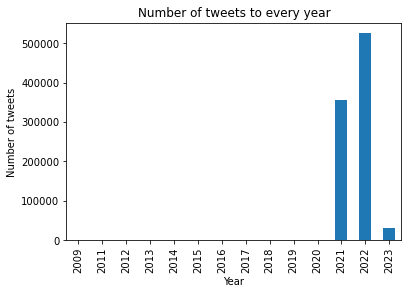

In [5]:
#plot the number of tweet to every year from created_at column and geo.country column
df['created_at'] = pd.to_datetime(df['created_at'])
df['year'] = df['created_at'].dt.year
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of tweets to every year')
plt.xlabel('Year')
plt.ylabel('Number of tweets')
plt.show()



#### Primo crollo 18/05/2020

In [6]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_1 = df[(df['created_at'] >= '2021-05-07') & (df['created_at'] <= '2021-05-19')]
df_1 = df_1.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_1 = df_1.reset_index(drop=True)
display (df_1.head(10))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,year
0,1391523807148527620,2021-05-09 22:41:43+00:00,SpaceX launching satellite Doge-1 to the moon ...,44196397,elonmusk,Elon Musk,127829693,113945,True,1391523807148527620,...,NaN,NaN,en,508942,15749,34035,106990,NaN,replied_to,2021
1,1392602041025843203,2021-05-12 22:06:14+00:00,Tesla &amp; Bitcoin https://t.co/YSswJmVZhP,44196397,elonmusk,Elon Musk,127829642,113945,True,1392602041025843203,...,NaN,NaN,en,472939,50315,115370,70428,NaN,quoted,2021
2,1392950720979030019,2021-05-13 21:11:46+00:00,"To be clear, I strongly believe in crypto, but...",44196397,elonmusk,Elon Musk,127829842,113945,True,1392950720979030019,...,NaN,NaN,en,347559,8152,54190,32174,NaN,quoted,2021
3,1390522866979033092,2021-05-07 04:24:20+00:00,"Cryptocurrency is promising, but please invest...",44196397,elonmusk,Elon Musk,127831360,113945,True,1390522866979033092,...,NaN,NaN,en,210248,4617,17455,35113,NaN,quoted,2021
4,1394170030741413888,2021-05-17 05:56:52+00:00,"@BTC_Archive To clarify speculation, Tesla has...",44196397,elonmusk,Elon Musk,127829868,113945,True,1394051036462071808,...,NaN,NaN,en,95142,7196,16689,16177,"[{""type"": ""replied_to"", ""id"": ""139405103646207...",replied_to,2021
5,1393939232373280769,2021-05-16 14:39:45+00:00,just let her enjoy astrology dude u like talki...,2845917028,bocxtop,first-mate prance,286017,250,True,1393939232373280769,...,NaN,NaN,en,91726,459,126,11378,NaN,quoted,2021
6,1392657323965829123,2021-05-13 01:45:55+00:00,Elon probably did not research how much energy...,902926941413453824,cz_binance,CZ 🔶 Binance,8134037,27699,True,1392657323965829123,...,NaN,NaN,en,59828,1247,5000,11388,"[{""type"": ""quoted"", ""id"": ""1392602041025843203...",replied_to,2021
7,1394625128257007618,2021-05-18 12:05:16+00:00,MicroStrategy has purchased an additional 229 ...,244647486,saylor,Michael Saylor⚡️,2931889,16772,True,1394625128257007618,...,NaN,NaN,en,57116,2096,3520,9895,NaN,replied_to,2021
8,1394005523083653120,2021-05-16 19:03:10+00:00,"I don’t get how Elon can run 4 companies, have...",1229475301945683969,juicecrypt0,Juice,4254,29,False,1394005523083653120,...,NaN,NaN,en,47124,750,1257,5968,NaN,quoted,2021
9,1393995872413888518,2021-05-16 18:24:49+00:00,@ChainLinkGod @PeterMcCormack Hey cryptocurren...,44196397,elonmusk,Elon Musk,127829978,113945,True,1393971202738302986,...,NaN,NaN,en,44812,2700,7130,6267,"[{""type"": ""replied_to"", ""id"": ""139399397501974...",replied_to,2021


In [6]:
#plot the number of tweet in every day from created_at between 2021/05/11 to 2021/05/24
#df['created_at'] = pd.to_datetime(df['created_at'])
#df['day'] = df['created_at'].dt.day
#df['day'].value_counts().sort_index().plot(kind='bar')
#plt.title('Number of tweets in every day')
#plt.xlabel('Day')
#plt.ylabel('Number of tweets')
#plt.show()



In [7]:
#create a plot with the id of twitter and the number of likes, retweets and replies
#df=pd.DataFrame(df,columns=["id","public_metrics.like_count","public_metrics.reply_count","public_metrics.retweet_count"])
#df.plot(x="id", y=["public_metrics.like_count","public_metrics.reply_count","public_metrics.retweet_count"], kind="bar")
#plt.title('')
#plt.xlabel('Id')
#plt.ylabel('Number of likes, replies and retweets')
#plt.show()



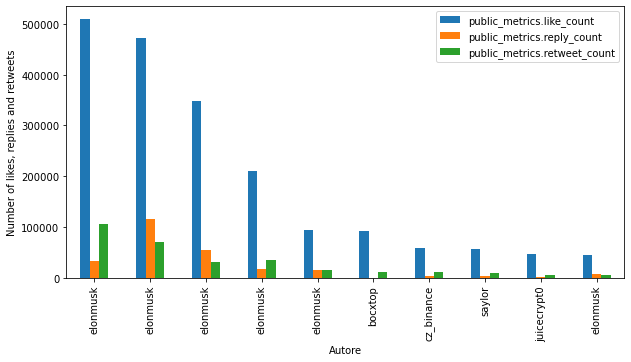

In [7]:
df_1=pd.DataFrame(df_1,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_1.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


#### Incremento valore 22/09/2021 04/10/2021

In [8]:
#select the rows with into the text column there are #bitcoin #luna #terra
df_2 = df[df['text'].str.contains('#lunaterra|#luna|#terra|#bitcoin|#blockchain|#crypto|#Crypto|#cryptocurre|#criptonews|#terraUSD|bitcoin|blockchain|crypto|cryptocurre|#stablecoin|stablecoin Terra', na=False, case=False)]
df_2 = df_2.reset_index(drop=True)


In [9]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_2 = df_2[(df_2['created_at'] >= '2021-09-22') & (df_2['created_at'] <= '2021-10-04')]
df_2 = df_2.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_2 = df_2.reset_index(drop=True)
display (df_2.head(10))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,year
0,1441416830485073924,2021-09-24 14:58:47+00:00,crypto is illegal and elon mucks gf broke up w...,36195015,BronzeHammer,John Hamburger Jr,58018,358,True,1441416830485073924,...,NaN,NaN,en,61470,284,133,7425,NaN,quoted,2021
1,1442949756993490945,2021-09-28 20:30:05+00:00,First steps...\n\n🌋#Bitcoin🇸🇻 https://t.co/duh...,20736511,nayibbukele,Nayib Bukele,4665548,4024,True,1442949756993490945,...,NaN,NaN,en,56368,2758,3268,11812,NaN,quoted,2021
2,1441846960332361730,2021-09-25 19:27:58+00:00,2.1 million Salvadorans are ACTIVELY USING @ch...,20736511,nayibbukele,Nayib Bukele,4665552,4024,True,1441846960332361730,...,NaN,NaN,en,39262,945,1881,7064,NaN,quoted,2021
3,1441398415712129024,2021-09-24 13:45:36+00:00,"China’s authoritarian crackdown on crypto, inc...",221162525,SenToomey,Senator Pat Toomey,191243,3021,True,1441398415712129024,...,NaN,NaN,en,38743,934,1957,7879,NaN,replied_to,2021
4,1441387389876723716,2021-09-24 13:01:48+00:00,🔍 New #Airdrop: Dr. Skull\n\n💲 Reward: Up to $...,1424243939716960260,DrSkull6,Dr. Skull,59298,9,False,1441387389876723716,...,NaN,NaN,en,34952,9410,7304,31834,NaN,replied_to,2021
5,1443629579416002567,2021-09-30 17:31:27+00:00,The United States has no intention to ban #Bit...,244647486,saylor,Michael Saylor⚡️,2931933,16774,True,1443629579416002567,...,NaN,NaN,en,33236,875,1376,7970,NaN,replied_to,2021
6,1444183509740883968,2021-10-02 06:12:35+00:00,💥 𝐓𝐇𝐄 $𝐑𝐄𝐍𝐀 𝐀𝐈𝐑𝐃𝐑𝐎𝐏 💥\nWARENA is giving away i...,1430363118392147968,WarenaOfficial,Warena | Hail To The Community 🤝,160018,306,False,1444183509740883968,...,NaN,NaN,en,31849,9978,6482,36209,NaN,replied_to,2021
7,1441389129665818626,2021-09-24 13:08:42+00:00,Nothing has created more wealth in the past de...,244647486,saylor,Michael Saylor⚡️,2931933,16774,True,1441389129665818626,...,NaN,NaN,en,31250,435,1182,5710,NaN,quoted,2021
8,1443893179196002307,2021-10-01 10:58:54+00:00,"#Bitcoin Sept closing price $43,834 .. like cl...",918804624303382528,100trillionUSD,PlanB,1867992,14653,False,1443893179196002307,...,NaN,NaN,en,31142,372,1540,4672,NaN,quoted,2021
9,1443235379218243591,2021-09-29 15:25:03+00:00,#biticaexchange \n\nHeloo dear all crypto curr...,1423345562896805892,BLOCKBEATSEX,BITICA EXCHANGE,56318,17,False,1443235379218243591,...,NaN,NaN,en,27437,19193,8949,28873,NaN,quoted,2021


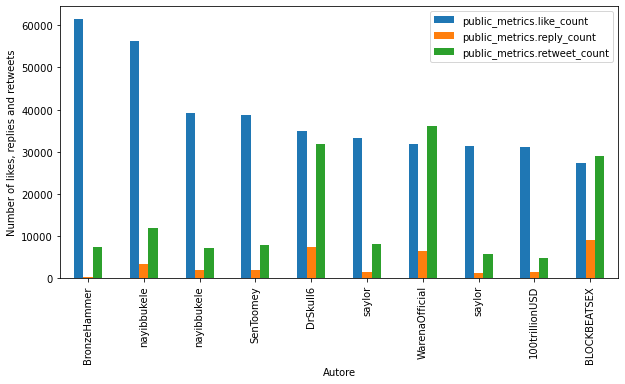

In [15]:
df_2=pd.DataFrame(df_2,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_2.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


#### Crollo 16/01/2022 - 05/02/2022

In [16]:
#select the rows with into the text column there are #bitcoin #luna #terra
df_3 = df[df['text'].str.contains('#lunaterra|#luna|#terra|#bitcoin|#blockchain|#crypto|#Crypto|#cryptocurre|#criptonews|#terraUSD|bitcoin|blockchain|crypto|cryptocurre|#stablecoin|stablecoin Terra', na=False, case=False)]
df_3 = df_3.reset_index(drop=True)

In [28]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_3 = df[(df['created_at'] >= '2022-02-20') & (df['created_at'] <= '2022-02-25')]
df_3 = df_3.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_3 = df_3.reset_index(drop=True)
display (df_3.head(15))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,year
0,1496124393361129475,2022-02-22 14:07:06+00:00,Crypto is just the stock market for people who...,70111948,joshgondelman,Josh Gondelman,198901,2174,True,1496124393361129475,...,NaN,NaN,en,69260,491,332,6032,NaN,quoted,2022
1,1495519382247821317,2022-02-20 22:03:00+00:00,"um, stolen? what do you mean? they changed h...",14412937,eevee,eevee ☢️,30374,407,False,1495519382247821317,...,NaN,NaN,en,42879,187,130,7065,"[{""type"": ""quoted"", ""id"": ""1495246939838840840""}]",replied_to,2022
2,1495191977289142273,2022-02-20 00:22:01+00:00,BREAKING: The state of California has introduc...,1291243382128304133,Dennis_Porter_,Dennis Porter,129993,820,False,1495191977289142273,...,NaN,NaN,en,23264,427,923,3672,NaN,quoted,2022
3,1496500783315050496,2022-02-23 15:02:45+00:00,New airdrop: Secretworld (SSD) \nTotal Reward:...,1151153768165076992,airdropinspect,Airdrop Inspector,1564819,1357,False,1496500783315050496,...,NaN,NaN,en,20856,3290,4145,20637,NaN,quoted,2022
4,1495720307264524290,2022-02-21 11:21:25+00:00,Bulgaria Stock Exchange Lists Bitcoin and Ethe...,902926941413453824,cz_binance,CZ 🔶 Binance,8132623,27711,True,1495720307264524290,...,NaN,NaN,en,20378,169,2676,3100,NaN,replied_to,2022
5,1495354888619913217,2022-02-20 11:09:22+00:00,"I bought Bitcoin at 68,900 to hedge against 7%...",509690453,ThinkingBitmex,ChimpZoo 🇸🇦,76334,1220,False,1495354888619913217,...,NaN,NaN,en,19905,344,2171,1213,NaN,replied_to,2022
6,1496849005535498244,2022-02-24 14:06:27+00:00,I never been in the negative since I started t...,20567939,MeekMill,MeekMill,11515734,7796,True,1496849005535498244,...,NaN,NaN,en,19001,833,2069,1305,NaN,replied_to,2022
7,1496972965438709769,2022-02-24 22:19:02+00:00,💙 LastChance #Airdrop is live!\n🏆 Total Airdro...,1385600098793664513,LastChance_auc,🇺🇦 LastChance | #1 Crypto Auctions,21299,6,False,1496972965438709769,...,NaN,NaN,en,18649,5286,6446,17452,NaN,quoted,2022
8,1495403017344016384,2022-02-20 14:20:37+00:00,💧 Epic Meta Airdrop 💧\n\n🏆 Task: ➕ 1...,1173425402523652096,AirdropStario,AirdropStar,1456346,522,False,1495403017344016384,...,NaN,NaN,en,14756,2768,2947,14932,NaN,replied_to,2022
9,1496092822252179456,2022-02-22 12:01:39+00:00,New airdrop: Monopoly Millionaire Game (MMG) \...,1151153768165076992,airdropinspect,Airdrop Inspector,1564819,1357,False,1496092822252179456,...,NaN,NaN,en,14281,2147,2974,14088,NaN,quoted,2022


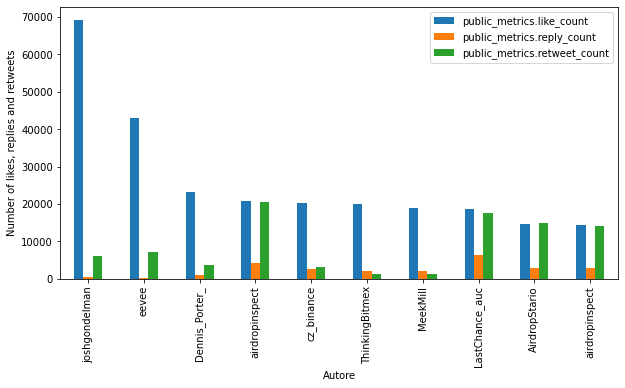

In [26]:
df_3=pd.DataFrame(df_3,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_3.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


#### Crollo 5/05/2022 - 18-05-2022 restringere fino al giorno del crollo

In [45]:
df_4 = df[df['text'].str.contains('#lunaterra|#luna|#terra|#bitcoin|#blockchain|#crypto|#Crypto|#cryptocurre|#criptonews|#terraUSD|bitcoin|blockchain|crypto|cryptocurre|#stablecoin|stablecoin Terra', na=False, case=False)]
df_4 = df_4.reset_index(drop=True)

In [46]:
#take data created_at into 2021/05/11 to 2021/05/24 and order by likes_count
df_4 = df_4[(df_4['created_at'] >= '2022-05-08') & (df_4['created_at'] <= '2022-05-15')]
df_4 = df_4.sort_values(by=['public_metrics.like_count','public_metrics.reply_count', 'public_metrics.retweet_count'], ascending=False)

df_4 = df_4.reset_index(drop=True)
display (df_4.head(15))

,id,created_at,text,author.id,author.username,author.name,author.public_metrics.followers_count,author.public_metrics.listed_count,author.verified,conversation_id,...,geo.id,geo.name,lang,public_metrics.like_count,public_metrics.quote_count,public_metrics.reply_count,public_metrics.retweet_count,referenced_tweets,type,year
0,1525083159725056002,2022-05-13 11:58:54+00:00,Crypto bros yesterday vs. Crypto bros today #w...,1542862735,Ryanair,Ryanair,701591,2243,True,1525083159725056002,...,NaN,NaN,en,231324,4634,2833,23565,NaN,replied_to,2022
1,1524724947460911104,2022-05-12 12:15:30+00:00,"If you invested $100 in Luna one month ago, th...",16877374,paleofuture,Matt Novak,30120,1166,False,1524724947460911104,...,NaN,NaN,en,161564,2306,1056,12208,NaN,replied_to,2022
2,1525123256977612800,2022-05-13 14:38:14+00:00,crypto is an mlm for people who think they're ...,17158189,MikeDrucker,Mike Drucker,206545,2289,True,1525123256977612800,...,NaN,NaN,en,103898,736,676,10230,NaN,replied_to,2022
3,1523742670044413954,2022-05-09 19:12:16+00:00,El Salvador just bought the dip! 🇸🇻\n\n500 coi...,20736511,nayibbukele,Nayib Bukele,4668515,4028,True,1523742670044413954,...,NaN,NaN,en,99887,4092,6144,13362,NaN,quoted,2022
4,1523646766549434373,2022-05-09 12:51:11+00:00,Monday morning is time to get back to work. #B...,244647486,saylor,Michael Saylor⚡️,2932171,16773,True,1523646766549434373,...,NaN,NaN,en,87148,1483,4068,11038,NaN,quoted,2022
5,1525276705144901632,2022-05-14 00:47:59+00:00,"I recently heard ""Crypto is Mary Kay for men""",330105456,indyfromspace,Dr. Sarah Parcak,91208,886,True,1525276705144901632,...,NaN,NaN,en,74877,893,498,9074,NaN,replied_to,2022
6,1524940435659038732,2022-05-13 02:31:46+00:00,1/ I am convinced the disillusioned young men ...,17264476,BriannaWu,Brianna Wu,143240,2722,True,1524940435659038732,...,NaN,NaN,en,65496,1593,1558,8017,NaN,replied_to,2022
7,1523816383443787788,2022-05-10 00:05:11+00:00,What I've learned today:\n\n1 Bitcoin = 1 Bitc...,1356434353623093249,greg16676935420,greg,400811,1240,False,1523816383443787788,...,NaN,NaN,en,40518,312,1011,4469,NaN,quoted,2022
8,1524935730308456448,2022-05-13 02:13:04+00:00,The Terra blockchain has officially halted at ...,1022028994772910086,terra_money,Terra 🌍 Powered by LUNA 🌕,1116423,4829,True,1524935730308456448,...,NaN,NaN,en,34679,1708,10434,7964,NaN,replied_to,2022
9,1525226016972582912,2022-05-13 21:26:34+00:00,A post-mortem on everything that transpired th...,1022028994772910086,terra_money,Terra 🌍 Powered by LUNA 🌕,1116421,4829,True,1525226016972582912,...,NaN,NaN,en,33748,497,9428,7272,NaN,replied_to,2022


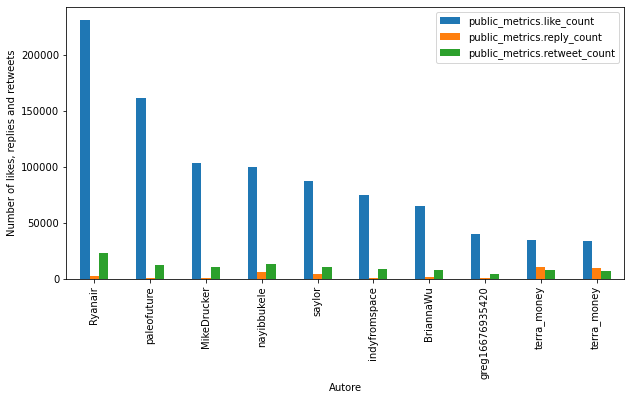

In [47]:
df_4=pd.DataFrame(df_4,columns=['author.username','public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'])

# Ordina il dataframe in base alla colonna 'public_metrics.like_count' in ordine decrescente
df1_sorted = df_4.sort_values(by=['public_metrics.like_count', 'public_metrics.reply_count','public_metrics.retweet_count'], ascending=False)

# Seleziona solo le prime 10 righe
df1_top10 = df1_sorted.head(10)
# Plotta il dataframe
df1_top10.plot(x='author.username', y=['public_metrics.like_count','public_metrics.reply_count','public_metrics.retweet_count'], kind='bar', figsize=(10,5))
plt.title('')
plt.xlabel('Autore')
plt.ylabel('Number of likes, replies and retweets')
plt.show()


#### Obiettivo 2 - Capire il tipo di interazione tra gli utenti

In [16]:
#df_cluster = df[df['text'].str.contains('#lunaterra|#luna|#terra|#bitcoin|#blockchain|#crypto|#Crypto|#cryptocurre|#criptonews|#terraUSD|bitcoin|blockchain|crypto|cryptocurre|#stablecoin|stablecoin Terra', na=False, case=False)]
#take only teet with more than 1000 likes
df_cluster = df[df['public_metrics.like_count'] >= 1000]

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_1440/3241774466.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster'] = kmeans.labels_


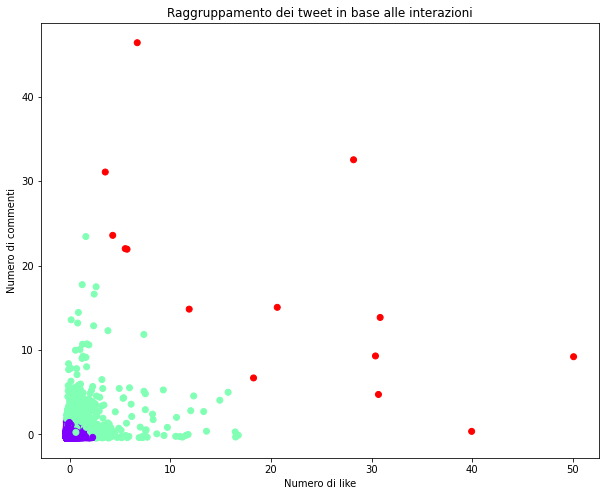

0    909516
1      2983
2        28
Name: cluster, dtype: int64
         public_metrics.like_count  public_metrics.reply_count  \
cluster                                                          
0                        67.717939                   18.565739   
1                     16532.996983                 4551.407979   
2                    259545.071429                46223.428571   

         public_metrics.retweet_count  
cluster                                
0                           25.241202  
1                        10798.922896  
2                        73801.071429  


In [18]:
# Caricamento dei dati dal file csv
#df = pd.read_csv('dataset/dataset.csv')

# Selezioniamo le feature per l'analisi della frequenza delle interazioni
features = ['public_metrics.like_count', 'public_metrics.reply_count', 'public_metrics.retweet_count']
X = df_cluster[features]

# Normalizzazione dei dati
X = (X - X.mean()) / X.std()

# Utilizziamo l'algoritmo k-means per raggruppare i tweet in 5 cluster
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Aggiungiamo i label di cluster al dataframe
df_cluster['cluster'] = kmeans.labels_

# Visualizziamo i cluster
plt.figure(figsize=(10,8))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Numero di like')
plt.ylabel('Numero di commenti')
plt.title('Raggruppamento dei tweet in base alle interazioni')
plt.show()

# Visualizziamo il numero di tweet in ogni cluster
print(df['cluster'].value_counts())

# Visualizziamo le statistiche delle interazioni per ogni cluster
print(df.groupby('cluster')[features].mean())
